In [116]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [111]:
# Code starts here
train = pd.read_csv('train.csv')

#train.info()
train = train.drop(['Unnamed: 0','ID'],1)

train['HOME_VAL']=train['HOME_VAL'].str.replace('$','')
train['HOME_VAL']=train['HOME_VAL'].str.replace(',','')
train['HOME_VAL']=train['HOME_VAL'].astype(float)

train = train.dropna()
train['HOME_VAL']=train['HOME_VAL'].astype(int)
null_columns=train.columns[train.isnull().any()]


#np.median(train['HOME_VAL'])
mean_value = train['HOME_VAL'].mean(skipna=True)
train['HOME_VAL'] = train['HOME_VAL'].mask(train.HOME_VAL == 0,mean_value)


train['AGE']=train['AGE'].astype(int)
train['YOJ']=train['YOJ'].astype(int)

train['INCOME']=train['INCOME'].str.replace('$','')
train['INCOME']=train['INCOME'].str.replace(',','')
train['INCOME']=train['INCOME'].astype(float)
# mean_value = train['INCOME'].mean(skipna=True)
# train['INCOME'] = train['INCOME'].mask(train.INCOME == 0,mean_value)
train['INCOME']=train['INCOME'].astype(int)


train['BLUEBOOK']=train['BLUEBOOK'].str.replace('$','')
train['BLUEBOOK']=train['BLUEBOOK'].str.replace(',','')
train['BLUEBOOK']=train['BLUEBOOK'].astype(float)
train['BLUEBOOK']=train['BLUEBOOK'].astype(int)

train['OLDCLAIM']=train['OLDCLAIM'].str.replace('$','')
train['OLDCLAIM']=train['OLDCLAIM'].str.replace(',','')
train['OLDCLAIM']=train['OLDCLAIM'].astype(float)
train['OLDCLAIM']=train['OLDCLAIM'].astype(int)

train['CLM_AMT']=train['CLM_AMT'].str.replace('$','')
train['CLM_AMT']=train['CLM_AMT'].str.replace(',','')
train['CLM_AMT']=train['CLM_AMT'].astype(float)
train['CLM_AMT']=train['CLM_AMT'].astype(int)

train['CAR_AGE']=train['CAR_AGE'].astype(int)

#train.isnull().sum()

train.head()

#np.mean(train['INCOME'])
#train.describe(include='all')

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,1,42,3,9,4701,No,150923.816901,Yes,z_F,z_High School,Student,12,Private,5900,1,Sports Car,no,0,0,No,4,0,9,1
1,0,50,0,7,10232,No,129979.000000,Yes,z_F,Masters,Home Maker,33,Private,24470,16,Minivan,no,5458,2,No,3,0,18,0
2,0,40,2,17,66200,Yes,223960.000000,z_No,z_F,Bachelors,Manager,53,Private,17260,13,z_SUV,no,0,0,No,1,629,9,1
3,2,38,2,13,34056,No,122908.000000,Yes,z_F,z_High School,z_Blue Collar,29,Commercial,6180,4,Sports Car,no,502,1,No,5,0,2,0
5,0,50,0,0,0,No,150923.816901,z_No,z_F,z_High School,Home Maker,37,Private,6500,3,Sports Car,no,0,0,No,0,2668,1,1


In [112]:
train['MSTATUS'] =train['MSTATUS'].astype('category').cat.codes
train['GENDER'] =train['GENDER'].astype('category').cat.codes
train['EDUCATION'] =train['EDUCATION'].astype('category').cat.codes
train['OCCUPATION'] =train['OCCUPATION'].astype('category').cat.codes
train['CAR_USE'] =train['CAR_USE'].astype('category').cat.codes
train['CAR_TYPE'] =train['CAR_TYPE'].astype('category').cat.codes
train['REVOKED'] =train['REVOKED'].astype('category').cat.codes
train['PARENT1'] =train['PARENT1'].astype('category').cat.codes
train['RED_CAR'] =train['RED_CAR'].astype('category').cat.codes
#train['RED_CAR'] =train['RED_CAR'].astype('category').cat.codes

train.describe()
train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,1,42,3,9,4701,0,150923.816901,0,1,4,6,12,1,5900,1,3,0,0,0,0,4,0,9,1
1,0,50,0,7,10232,0,129979.000000,0,1,2,2,33,1,24470,16,0,0,5458,2,0,3,0,18,0
2,0,40,2,17,66200,1,223960.000000,1,1,1,4,53,1,17260,13,5,0,0,0,0,1,629,9,1
3,2,38,2,13,34056,0,122908.000000,0,1,4,7,29,0,6180,4,3,0,502,1,0,5,0,2,0
5,0,50,0,0,0,0,150923.816901,1,1,4,2,37,1,6500,3,3,0,0,0,0,0,2668,1,1


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

0    3999
1    2107
Name: CLAIM_FLAG, dtype: int64


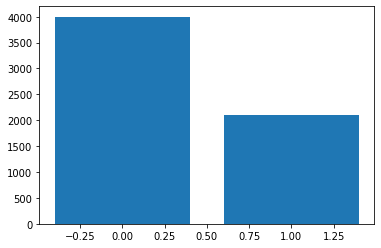

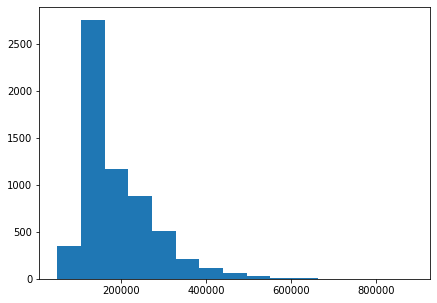

In [113]:
# Code starts here
X = train.drop('CLAIM_FLAG',1)
y = train['CLAIM_FLAG'].copy()

value = y.value_counts()
plt.bar(value.index, value, )
print(value)

plt.figure(figsize=(7,5))
plt.hist(X['HOME_VAL'], bins=15)
plt.show()



# Code ends here.

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [123]:
# Code Starts here
from sklearn.metrics import recall_score, precision_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0 , stratify =y)

smote = SMOTE(random_state=0)

X_sample, y_sample = smote.fit_sample(X_train, y_train)

model_smote = LogisticRegression(random_state=0)
model_smote.fit(X_sample, y_sample)

y_pred = model_smote.predict(X_test)
accuracy_smote = model_smote.score(X_test, y_test)

recall_smote = recall_score(y_test, y_pred)
precision_smote = precision_score(y_test, y_pred)

f1_smote = f1_score(y_test, y_pred)

print(f1_smote, recall_smote,accuracy_smote )

0.669467787114846 0.566350710900474 0.806873977086743


In [124]:
from imblearn.under_sampling import TomekLinks


t1 = TomekLinks(random_state=0)
X_sample4, y_sample4 = t1.fit_sample(X_train, y_train)

model_t1 = LogisticRegression(random_state=0)
model_t1.fit(X_sample4, y_sample4)

y_pred = model_t1.predict(X_test)
accuracy_tl = model_t1.score(X_test, y_test)

recall_tl = recall_score(y_test, y_pred)
precision_tl = precision_score(y_test, y_pred)

f1_tl = f1_score(y_test, y_pred)

f1_tl

0.6288209606986899

In [128]:
rf_clf = RandomForestClassifier(random_state=0)
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


grid_search = GridSearchCV(rf_clf, param_grid=parameter_grid )

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)


rf1 = f1_score(y_test, y_pred)
print(rf1)

0.6850828729281767


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [175]:
# Code Starts here
test = pd.read_csv('test.csv')

testt = test.drop(['Unnamed: 0','ID'],1)


testt = testt.fillna(method='ffill')
testt['HOME_VAL']=testt['HOME_VAL'].str.replace('$','')
testt['HOME_VAL']=testt['HOME_VAL'].str.replace(',','').astype(float)



#np.median(train['HOME_VAL'])
mean_value = testt['HOME_VAL'].mean(skipna=True)
testt['HOME_VAL'] = testt['HOME_VAL'].mask(testt.HOME_VAL == 'NaN',mean_value)
testt['HOME_VAL']=testt['HOME_VAL'].astype(int)


testt['AGE']=testt['AGE'].astype(int)
testt['YOJ']=testt['YOJ'].astype(int)

testt['INCOME']=testt['INCOME'].str.replace('$','')
testt['INCOME']=testt['INCOME'].str.replace(',','').astype(float)

# mean_value = train['INCOME'].mean(skipna=True)
# train['INCOME'] = train['INCOME'].mask(train.INCOME == 0,mean_value)
testt['INCOME']=testt['INCOME'].astype(int)


testt['BLUEBOOK']=testt['BLUEBOOK'].str.replace('$','')
testt['BLUEBOOK']=testt['BLUEBOOK'].str.replace(',','')
testt['BLUEBOOK']=testt['BLUEBOOK'].astype(float)
testt['BLUEBOOK']=testt['BLUEBOOK'].astype(int)

testt['OLDCLAIM']=testt['OLDCLAIM'].str.replace('$','')
testt['OLDCLAIM']=testt['OLDCLAIM'].str.replace(',','').astype(float)

testt['OLDCLAIM']=testt['OLDCLAIM'].astype(int)

testt['CLM_AMT']=testt['CLM_AMT'].str.replace('$','')
testt['CLM_AMT']=testt['CLM_AMT'].str.replace(',','').astype(float)

testt['CLM_AMT']=testt['CLM_AMT'].astype(int)

testt['CAR_AGE']=testt['CAR_AGE'].astype(int)


cols = testt.select_dtypes('object').columns
for c in cols:
    testt[c] =testt[c].astype('category').cat.codes
    

prediction = model_smote.predict(testt)
output = pd.DataFrame({'': test['Unnamed: 0'], 'CLAIM_FLAG': prediction})
output.to_csv('imbalance.csv', index=False)
output


#testt[testt['HOME_VAL'].isnull()]



,,CLAIM_FLAG
0,635,1
1,4189,0
2,5062,0
3,8325,0
4,9281,0
...,...,...
2056,3139,1
2057,7281,0
2058,3164,0
2059,2915,0
